## Multivariate Normal PDF(Bivariate in the following example) 
### General formula for Multivariate PDF <br>

$$
    {\displaystyle F(\mathbf {x} )=\mathbb {P} (\mathbf {X} \leq \mathbf {x} ),\quad {\text{where }}\mathbf {X} \sim {\mathcal {N}}({\boldsymbol {\mu }},\,{\boldsymbol {\Sigma }}).}
$$




$$
{\displaystyle F(\mathbf {x} )={\frac {\exp \left(-{\frac {1}{2}}({\mathbf {x} }-{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})\right)} {\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}}
$$

In [18]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [18, 16]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['savefig.dpi'] = 60
plt.rcParams['font.size'] = 14

In [20]:
# Dataset settings 
d = 2
data_len = 500

# dataset initialization
data = np.random.random((data_len, d)) 
#data = data.astype(int)

# Compute Mean columnwise
mean_xi = np.mean(data, axis=0)

# Compute Covariance Matrix inverse
cov_mat = np.cov(data, rowvar=False)
cov_mat_inv = np.linalg.inv(cov_mat)

# Compute the determinant of Covariance Matrix
det_cov_mat = np.linalg.det(cov_mat)

# Compute P(x_i) for each and every rows (2D row data)
p_xis = []
for row in data:
    # Make its row as Matrix (2x1)
    xi = np.matrix(row)
    # Make mean as Matrix (2x1)
    mean_xi = np.matrix(mean_xi)
    # Compute the first part of the equation
    eq_1 = (1 / (((2 * np.pi) ** (1 / d))) * np.sqrt(det_cov_mat))
    # Compute MAHALANOBIS DISTANCE
    mahl_xi = (xi - mean_xi) * cov_mat_inv * (xi - mean_xi).T
    # Compute the SECOND PART of the equation
    eq_2 = np.exp(-(1/2 * mahl_xi[0,0]))
    # Store PDF of each row 
    p_xis.append(eq_1 * eq_2)

### Plotting PDF 

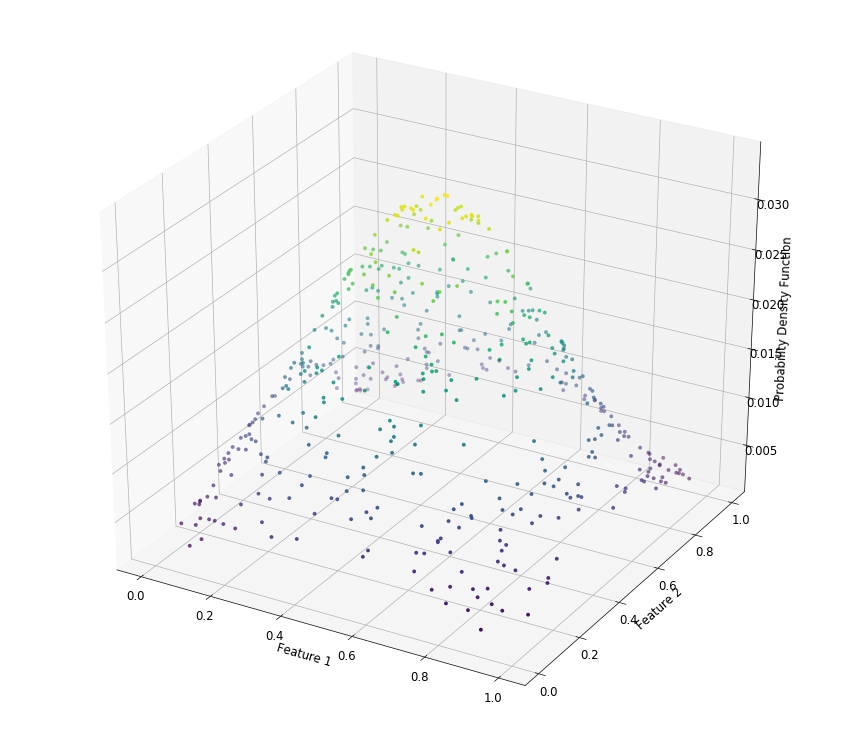

In [21]:
xi = data[:,0]
yi = data[:,1]
zi = p_xis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, c=zi, cmap='viridis', linewidth=0.1);
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Probability Density Function')
plt.show()